# Data Mining Versuch Recommender Systeme

* Autor: Prof. Dr. Johannes Maucher
* Datum: 30.09.2015

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* __Ähnlichkeit:__ Verfahren zur Bestimmung der Ähnlichkeit zwischen Personen (Kunden) und Elementen (Produkten)
* __Empfehlungssysteme__ Collaborative Filtering 
* __Collaborative Filtering:__ Nutzerbezogener Ansatz und elementbasierter Ansatz

Sämtliche Verfahren und Algorithmen werden in Python implementiert.

## Theorie zur Vorbereitung
### Recommender Systeme
Recommender Systeme werden im E-Commerce eingesetzt um Werbung in Form von kundenspezifischen Empfehlungen zu verteilen. Weitläufig bekannt sind die Amazon-Empfehlungen, die entweder per e-mail geschickt oder nach dem Log-In in der Web-Page angezeigt werden. Diese Empfehlungen werden in Abhängigkeit von den bisher vom jeweiligen Kunden gekauften bzw. bewerteten Produkten erstellt. In diesem Versuch werden die derzeit wohl am weitest verbreiteteten Verfahren für die Erzeugung kundenspezifischer Empfehlungen vorgestellt, darunter das elementweise Collaborative Filtering, welches z.B. auch von Amazon eingesetzt wird.     

Direkt-Marketing Methoden wie die kundenspezifische Erzeugung und Bereitstellung von Werbung erfordern detaillierte Kunden- und Warenkorbanalysen. Kunden mit ähnlichem Kaufverhalten werden in Kundengruppen zusammengefasst. Die Warenkorbanalyse untersucht u.a. welche Waren bevorzugt im Verbund von der gleichen Person gekauft werden. Damit kann ein Händler Werbung in Form von Empfehlungen individuell und gezielt an seine Kunden richten, abhängig davon welcher Kundengruppe er angehört und welche Produkte bevorzugt von dieser Kundengruppe nachgefragt werden. 

Im ersten Teil der Übung werden fiktive Daten in einer überschaubaren Menge verwendet. Es handelt sich hier um Filmbewertungen. Anhand dieses Beispiels sollen die notwendigen Methoden und Abläufe implementiert und getestet werden. Diese werden im zweiten Teil der Übung auf echte Daten angewandt. Hierzu werden über eine Python-API Daten vom Internet-Meta-Radio _last.fm_ integriert. Auf der Basis dieser Daten sollen dann Musikempfehlungen für last.fm User berechnet werden. 

Recommender Systeme lassen sich mit

* Clustering Verfahren
* Suchalgorithmen
* Collaborativen Filtering 
 
realisieren. Am häufigsten wird hierbei das Collaborative Filtering eingesetzt. Für das Collaborative Filtering wird jeder der $M$ User durch einen $N$-dimensionalen Vektor beschrieben, wobei $N$ die Anzahl der Produkte im Angebot des Händlers ist. Jedes Element im Vektor gehört zu einem speziellen Produkt. Das Element hat den Wert 1, wenn der User dieses Produkt bereits gekauft hat, sonst 0 (andere Wertbelegungen sind möglich, z.B. wenn Produktbewertungen vorliegen). Alle $M$ Zeilenvektoren können zur _User/Item_ Matrix zusammengefasst werden (siehe Abbildung).


<img src="https://maucher.home.hdm-stuttgart.de/Pics/UserItemMatrix.png" style="width:500px" align="center">

Das traditionelle **userbasierte Collaborative Filtering (UCF)**, benutzt die Ähnlichkeit zwischen Benutzern: Um für User $U_i$ eine Empfehlung zu erzeugen wird zunächst der diesem User ähnlichste Kunde (oder eine Menge vom ähnlichsten Kunden) ermittelt. Dann werden $U_i$ die Produkte (Items) empfohlen, welche der ähnlichste Kunde gekauft hat, $U_i$ selbst jedoch noch nicht. 

Dieser Ansatz skaliert schlecht im Fall sehr großer *User/Item*-Matrizen. Ausserdem ist er für User, welche erst wenige Produkte gekauft haben unzuverlässig. Besser eignet sich in diesen Fällen das **itembasierte Collaborative Filtering (ICF)**. Es wird u.a. von Amazon.com eingesetzt. Diese Variante benutzt die Ähnlichkeit zwischen Produkten (Items). Dabei sind Produkte umso ähnlicher je mehr Kunden diese Produkte gemeinsam gekauft haben. Für die Produkte welche ein Referenzuser $U_i$ bereits gekauft hat, werden die ähnlichsten Produkte ermittelt. Diese ähnlichsten Produkte werden $U_i$ empfohlen, wenn er sie nicht schon selbst gekauft hat.

Im folgenden Abschnitt werden einige gebräuchliche Metriken für die Berechnung der Ähnlichkeit zwischen Benutzern oder Artikeln vorgestellt. Für Collaboratives Filtering wird sehr häufig das Cosinus - Ähnlichkeitsmaß eingesetzt.


### Gebräuchliche Ähnlichkeitsmaße

Die __euklidische Distanz__ $d_E(\underline{a},\underline{b})$ zwischen zwei n-dimensionalen Vektoren $\underline{a}=(a_1,\ldots,a_n)$ und $\underline{b}=(b_1,\ldots,b_n)$ berechnet sich zu
	$$
	d_E(\underline{a},\underline{b})=\sqrt{\sum_{i=1}^n (a_i-b_i)^2}
	$$
Zwei Vektoren können als umso ähnlicher erachtet werden, je kleiner deren euklidische Distanz ist. 
Ein auf der euklidischen Metrik basierendes Ähnlichkeitsmaß zwischen zwei Vektoren $\underline{a}$ und $\underline{b}$ kann durch 
$$
s_E(\underline{a},\underline{b})=\frac{1}{1+d_E(\underline{a},\underline{b})}
$$
angegeben werden.


__Pearson Korrelation__
Die Ähnlichkeit zwischen zwei Vektoren kann auch durch den Pearson-Korrelationskoeffizient $\rho_{\underline{a},\underline{b}}$ ausgedrückt werden. Er berechnet sich zu
$$
\rho_{\underline{a},\underline{b}}= \frac{1}{N}\cdot \sum\limits_{i=1}^{N}\frac{(a_i-\overline{a})}{\sigma_a} \frac{(b_i-\overline{b})}{\sigma_b}
$$
Dabei bezeichnet $N$ die Länge der Vektoren, $\overline{a}$ den Mittelwert und $\sigma_a$ die Standardabweichung des Vektors $\underline{a}$. 

Der Pearson-Korrelationskoeffizient misst die lineare Abhängigkeit zwischen zwei Vektoren. Der maximale Wert von $+1$ wird erreicht, wenn die durch die beiden Vektoren definierten N Punkte im 2-dimensionalen Raum auf einer ansteigenden Geraden liegen. Der Minimalwert von $-1$ wird erreicht, wenn die Punkte auf einer abfallenden Geraden liegen. Der Betrag des Koeffizienten ist umso kleiner, je stärker die Punkte von einer fiktiven Geraden (kann durch lineare Regression berechnet werden) abweichen. Der Koeffizient ist $0$ wenn keine lineare Abhängigkeit zwischen den Vektoren besteht.


__Cosinus Ähnlichkeitsmaß__
Die Ähnlichkeit zwischen zwei Vektoren kann auch durch den Cosinus $\cos(\underline{a},\underline{b})$ ausgedrückt werden. Er berechnet sich zu
$$
\cos(\underline{a},\underline{b})= \frac{\underline{a} \cdot \underline{b}}{\left\|\underline{a}\right\|\cdot \left\|\underline{b}\right\|}
$$
wobei im Zähler das Skalarprodukt der beiden Vektoren steht und mit $\left\|\underline{x}\right\|$ der Betrag des Vektors $\underline{x}$ bezeichnet wird.

Falls die Vektoren $\underline{a}$ und $\underline{b}$ mittelwertfrei sind, ist der Cosinus-Ähnlichkeitswert gleich dem Pearson-Korrelationswert. In der Dokument- und Textanalyse wird vornehmlich das Cosinus-Ähnlichkeitsmaß verwendet. 


__Russel Rao Ähnlichkeitsmaß__
Die Russel Rao-Ähnlichkeit zwischen zwei binären Vektoren $\underline{a}$ und $\underline{b}$ mißt das Verhältnis zwischen der Anzahl $\alpha$ der Stellen in denen beide Vektoren den Wert 1 haben und der Länge $n$ der Vektoren. Z.B. ist für die Vektoren $\underline{a}=(1,0,1,0,0,1)$ und $\underline{b}=(0,1,1,1,0,1)$ die Russel-Rao-Ähnlichkeit $s_{RR}(\underline{a},\underline{b})=2/6=0.333$.

__Jaccard Ähnlichkeitsmaß__
Die Jaccard-Ähnlichkeit zwischen zwei binären Vektoren $\underline{a}$ und $\underline{b}$ mißt das Verhältnis zwischen der Anzahl $\alpha$ der Stellen in denen beide Vektoren den Wert $1$ haben und der Anzahl der Stellen in denen mindestens einer der beiden Vektoren ungleich $0$ ist. Z.B. ist für die Vektoren $\underline{a}=(1,0,1,0,0,1)$ und $\underline{b}=(0,1,1,1,0,1)$ die Jaccard-Ähnlichkeit $s_{J}(\underline{a},\underline{b})=2/5=0.4$. Die Jaccard Metrik wird in diesem Versuch für die Bestimmung der Ähnlichkeit von *last.fm*-Usern eingesetzt.


<div style="color:#777777">

## Vor dem Versuch zu klärende Fragen
Eine Untermenge der im Folgenden aufgeführten Fragen wird zu Beginn des Versuchs im Rahmen eines Gruppenkolloqs abgefragt. Auf jede Frage sollte von mindestens einem Gruppenmitglied eine Antwort geliefert werden und jedes Gruppenmitglied muss mindestens eine der gestellten Fragen beantworten können.

**Aufgaben:**

* Beschreiben Sie das Prinzip des userbasierten Collaborativen Filtering (UCF).

**Collaborativen Filtering**

Generell ist es beim Collaborativen Filtering so, dass man zu jedem Nutzer speichert, ob er ein Item bereits gekauft hat. Jeder Nutzer hat somit einen Vektor der so viele dimensionen hat, wie die angeboten Items. Wenn er ein Item gekauft hat steht dafür eine 1, wenn nicht eine 0. Diese Nutzer-Vektoren kann man mit den anderen Nutzer-Vektoren verknüpfen und zu einer Matrix zusammenfassen.

**Userbasierten Collaborativen Filtering**

Beim userbasierten Collaborativen Filtering nutzt man diese Nutzer-Vektoren, um Produkt-Empfehlungen zu berechnen. Dabei wird von einem Nutzer n1 der Nutzer-Vektor genommen und geschaut welcher Nutzer n2 den ähnlichsten Nutzer-Vektor hat. Dann werden dem Nutzer n1 die Produkte vorgeschlagen, die er selbst nicht, aber der Nutzer n2 schon gekauft hat.

<div style="color:#777777">

* Welche Nachteile hat das UCF?

**Nachteile UCF**
1. Je größer die Matrix aus Nutzer-Vektoren wird, desto länger dauert es einen ähnlichen Nutzer zu finden. Wenn diese Matrix zu groß wird, dauert der Suchvorgang einfach zu lange.
2. Wenn ein Nutzer noch zu wenig Produkte gekauft hat, kann man eine schlechtere Vorhersage treffen, weil es dann zu viele ähnlichen Nutzer gibt, die auch sehr unterschiedliche Produkte gekauft haben können.

<div style="color:#777777">

* Worin besteht der Unterschied zwischen UCF und itembasierten Collaborativen Filtering (ICF)?

**Unterschied**

Man entscheidet nicht anhand des ähnlichsten Nutzers, sondern anhand von ähnlichen Produkten zu einem Produkt die der Nutzer bereits gekauft hat.

**Itembasierten Collaborativen Filtering**

Je mehr Kunden die gleichen gemeinsamen Produkte gekauft haben, desto ähnlicher sind diese Produkte sich. Wenn man dann entscheiden möchte welches Produkt vorgeschlagen wird, bestimmt man die ähnlichsten Produkte, die der Nutzer noch nicht gekauft hat. 

Dieses Vorgehen wird von Amazon benutzt und die Ergebnisse sieht man dort bei "Kunden, die ... kauften, kauften auch ...".

Quelle: https://www.dogan-ucar.de/item-based-collaborative-filtering/

<div style="color:#777777">

* Gegeben seien die Vektoren 

    $$
    \begin{eqnarray*}
    \underline{a} & = & [1,2,3,4,5,6] \\
    \underline{b} & = & [3,3,5,6,7,8] \\
    \end{eqnarray*}
    $$
    
Schreiben Sie eine Python Funktion, die den Mittelwert derartiger Vektoren berechnet. Schreiben Sie eine weitere Funktion, die die Varianz berechnet

In [1]:
a = [1, 2, 3, 4, 5, 6]
b = [3, 3, 5, 6, 7, 8]

In [2]:
# Mittelwert
def calculateMean(list):
    sum = 0
    for item in list:
        sum += item
    return sum / len(list)

mean_a = calculateMean(a)
mean_b = calculateMean(b)

print("Mittelwert a:", mean_a)
print("Mittelwert b:", mean_b)

Mittelwert a: 3.5
Mittelwert b: 5.333333333333333


In [3]:
# Varianz
def calculateVariance(list):
    sum = 0
    mean = calculateMean(list)
    for item in list:
        deviation = item - mean
        deviation_quadratic = deviation**2
        sum += deviation_quadratic
    return sum / (len(list) - 1)

variance_a = calculateVariance(a)
variance_b = calculateVariance(b)

print("Varianz a:", variance_a)
print("Varianz b:", variance_b)

Varianz a: 3.5
Varianz b: 4.266666666666667


In [4]:
import statistics

print("Mittelwert a:", statistics.mean(a))
print("Mittelwert b:", statistics.mean(b))

print("Varianz a:", statistics.variance(a))
print("Varianz b:", statistics.variance(b))

Mittelwert a: 3.5
Mittelwert b: 5.333333333333333
Varianz a: 3.5
Varianz b: 4.266666666666667


<div style="color:#777777">

* Wie groß ist die

    - Euklidische Ähnlichkeit
    - Pearson Ähnlichkeit
    - Cosinus Ähnlichkeit
    
    zwischen den Vektoren $\underline{a}$ und $\underline{b}$? 

In [5]:
# Euklidische Ähnlichkeit
from scipy.spatial import distance

euclidean_distance = distance.euclidean(a, b)
print("Euklidische Ähnlichkeit:", euclidean_distance)

# Euklidische Ähnlichkeit Metrik
euclidean_similarity_metric = 1 / (1 + euclidean_distance)
print("Euklidische Ähnlichkeit Metrik:",euclidean_similarity_metric)

Euklidische Ähnlichkeit: 4.58257569495584
Euklidische Ähnlichkeit Metrik: 0.179128784747792


In [6]:
# Pearson Ähnlichkeit
from scipy import stats

pearson_correlation, _ = stats.pearsonr(a, b)
print("Pearson Ähnlichkeit:", pearson_correlation)

Pearson Ähnlichkeit: 0.9833434220628547


In [7]:
# Cosinus Ähnlichkeit
import numpy as np

a = np.array(a)
b = np.array(b)

cosine_similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print("Cosinus Ähnlichkeit:", cosine_similarity)

Cosinus Ähnlichkeit: 0.991060084745164


<div style="color:#777777">

* In welchen Fällen sind Cosinus- und Pearsonähnlichkeit der euklidischen Ähnlichkeit vorzuziehen?

Bei der Cosinus Ähnlichkeit bekommt man einen Wert zwischen −1 und 1 heraus.
-  0 für unabhängig 
- -1 genau entgegengerichtet 
- 1 genau gleichgerichtet.

Bei der Pearson Ähnlichkeit bekommt man ebenfalls einen Wert zwischen −1 und 1 heraus.
- 0 keine lineare Abhängigkeit
- -1 alle Punkte herabsteigende Gerade
- 1 alle Punkte auf aufsteigender Gerade

Bei der euklidischen Distanz bekommt man nur einen Wert herraus bei dem man sagen kann: je kleiner er ist desto ähnlicher die Vektoren.

Also wenn man genauere informationen zu den Vektoren erhalten möchte oder deren lineare Abhängikeit bestimmen will nutzt man die Cosinus- und Pearsonähnlichkeit, wenn man dahingegen nur anhand einer Zahl wissen will wie ähnliche sich Vektoren sind reicht die euklidische Distanz.

- In Dokument und Textanalysen wird eher das Cosinus Ähnlichkeitsmaß verwendet.
- Die Pearson Ähnlichkeit misst nur die lineare Abhängigkeit zwischen zwei Vektoren (Es kann auch sein das sie exponentiell oder anders voneinander Abhängen)

Quellen:
- https://de.wikipedia.org/wiki/Kosinus-%C3%84hnlichkeit
- https://de.wikipedia.org/wiki/Korrelationskoeffizient
- https://studyflix.de/statistik/pearson-korrelation-1051
- https://blog.stefan-koch.name/2011/04/04/algorithmen-zur-bestimmung-von-aehnlichkeiten

Cosinus Ähnlichkeit. Misst Winkel zwischen zwei Punkten. Leute geben unterschiedlich viele Sterne Bewertung. Manche geben immer 5 Sterne für einen Film wenn er gut ist, während andere nur 3 geben wenn er gut ist. Mit der euklidischen Distanz kann man das nicht messen. Mit dem Cosinus Ähnlichkeits maß schon. Weil dieser die Winkel betrachtet.

Wenn es nicht um die distanz geht, sondern um die Richtung geht.

In [8]:
from IPython.display import Latex
from IPython.display import Image
import pylast

# Versuchsdurchführung
## Teil 1: Fiktive Filmbewertung
### Daten
Folgende Tabelle enthält die Filmbewertungen von 7 Personen.
from IPython.display import Latex
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:


<img src="https://maucher.home.hdm-stuttgart.de/Pics/recommenderFilmRecommendations.PNG" style="width:500px" align="center">



Die Tabelle ist als Python dictionary _critics_ implementiert. Die Keys des Python-Dictionary definieren die Namen von Personen (Zeilen in der Matrix), die Filme bewertet haben. Die Values sind selbst wieder Dictionarys, welche als Keys die Filmnamen (Spalten in der Matrix) und als Values die jeweilige Filmbewertung (Matrixelment) enthalten.

In [9]:
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}
}

### Ähnlichkeiten berechnen

Für die Bestimmung der Ähnlichkeit zwischen Personen und Produkten werden in diesem Versuch ein auf der euklidischen Distanz basierendes Ähnlichkeitsmaß und die Pearson-Korrelation verwendet. Beide Ähnlichkeitsmaße sind in den unten definierten Funktionen implementiert. Alle drei hier implementierten Funktionen zur Berechnung der Ähnlichkeit erhalten als Übergabeparameter das oben definierte Dictionary, das die Filmbewertungen enthält und die Namen der zwei Personen, die verglichen werden sollen. 

Zu beachten ist, dass in beiden Funktionen für die Berechnung der Ähnlichkeit zwischen zwei Personen nur die Produkte berücksichtigt werden, welche von beiden Personen schon bewertet wurden. Es handelt sich hier also um modifizierte Ähnlichkeitsfunktionen. 

__Aufgabe:__
Fragen Sie von diesem Dictionary _Toby's_ Bewertung des Films _Snakes on a Plane_ ab und geben Sie diesen Wert aus: 

In [10]:
critic_toby_snakes = critics["Toby"]["Snakes on a Plane"]
print(critic_toby_snakes)

4.5


In [11]:
import numpy as np
import scipy.spatial.distance as sci


def sim_euclid(prefs,person1,person2,normed=True):
    ''' Returns a euclidean-distance-based similarity score for 
    person1 and person2. In the distance calculation the sum is computed 
    only over those items, which are nonzero for both instances, i.e. only
    films which are ranked by both persons are regarded.
    If the parameter normed is True, then the euclidean distance is divided by
    the number of non-zero elements integrated in the distance calculation. Thus
    the effect of larger distances in the case of an increasing number of commonly ranked
    items is avoided.
    '''
    # Get the list of shared_items
    si={}
    for item in prefs[person1]: 
        if item in prefs[person2]: 
            si[item] = 1
            
    # len(si) counts the number of common ratings
    # if they have no ratings in common, return 0
    if len(si) == 0: 
        return 0

    # Add up the squares of all the differences
    sum_of_squares=np.sqrt(sum([pow(prefs[person1][item]-prefs[person2][item],2) 
                     for item in prefs[person1] if item in prefs[person2]]))
    if normed:
        sum_of_squares= 1.0/len(si)*sum_of_squares
    return 1/(1+sum_of_squares)


def sim_pearson(prefs,p1,p2):
    '''
    Returns the Pearson correlation coefficient for p1 and p2
    '''

    # Get the list of commonly rated items
    si={}
    for item in prefs[p1]: 
        if item in prefs[p2]: 
            si[item]=1

    # if they are no ratings in common, return 0
    if len(si)==0: return 0

    # Sum calculations
    n=len(si)

    # Calculate means of person 1 and 2
    mp1=np.mean([prefs[p1][it] for it in si])
    mp2=np.mean([prefs[p2][it] for it in si])

    # Calculate standard deviation of person 1 and 2
    sp1=np.std([prefs[p1][it] for it in si])
    sp2=np.std([prefs[p2][it] for it in si])

    # If all elements in one sample are identical, the standard deviation is 0. 
    # In this case there is no linear correlation between the samples
    if sp1==0 or sp2==0:
        return 0
    r=1/(n*sp1*sp2)*sum([(prefs[p1][it]-mp1)*(prefs[p2][it]-mp2) for it in si])
    return r


def sim_RusselRao(prefs,person1,person2,normed=True):
    ''' Returns RusselRao similaritiy between 2 users. The RusselRao similarity just counts the number
    of common non-zero components of the two vectors and divides this number by N, where N is the length
    of the vectors. If normed=False, the division by N is omitted.
    '''
    # Get the list of shared_items
    si={}
    commons=0
    for item in prefs[person1]: 
        if prefs[person1][item]==1 and prefs[person2][item]==1:   
            commons+=1
    #print commons
    if not normed:
        return commons
    else:
        return commons*1.0/len(prefs[person1]) 

**Aufgabe:**
1. Geben Sie die euklidische Ähnlichkeit und die Pearson Ähnlichkeit zwischen den Personen _Toby_ und _Lisa Rose_ aus.
2. Diskutieren Sie die unterschiedlichen Ähnlichkeitswert.

#### 1. Aufgabe Euklidische Ähnlichkeit und Pearson Ähnlichkeit
Todo

Diskutieren Sie die unterschiedlichen Ähnlichkeitswert.

In [12]:
sim_euclid_toby_lisa = sim_euclid(critics, "Toby", "Lisa Rose")
print("Euklidische Ähnlichkeit Tony und Lisa Rose:", sim_euclid_toby_lisa)

sim_pearson_toby_lisa = sim_pearson(critics, "Toby", "Lisa Rose")
print("Pearson Ähnlichkeit Tony und Lisa Rose:", sim_pearson_toby_lisa)

Euklidische Ähnlichkeit Tony und Lisa Rose: 0.615911621788925
Pearson Ähnlichkeit Tony und Lisa Rose: 0.9912407071619302


__Aufgabe:__
0. Schreiben Sie eine Funktion `topMatches(prefs,person,similarity)`, welche für eine beliebige in _critics_ enthaltene Person die Ähnlichkeitswerte zu allen anderen Personen berechnet und in einer geordneten Liste zurück gibt. Der Funktion soll als Übergabeparameter auch die anzuwendende Ähnlichkeitsfunktion (`sim_euclid` oder `sim_pearson`) übergeben werden können. Berechnen Sie mit dieser Funktion für jede Person die *top matches*, zunächst unter Verwendung der euklidischen- dann unter Verwendung der Pearson-Ähnlichkeit.
1. Geben Sie mit der implementierten Funktion die *top matches* der Person Toby aus.
2. Vergleichen Sie die beiden Ähnlichkeitsmaße. Welches Ähnlichkeitsmaß erscheint Ihnen für diesen Anwendungsfall sinnvoller und warum?

### 0. Aufgabe - Top Matches

In [74]:
def topMatches(prefs, person, similarity):
    # Check if person in critics

    similarity_values = {}
    for person_pref in prefs:
        if person_pref == person:
            continue
        similarity_values[person_pref] = (similarity(prefs, person, person_pref))
        
    return similarity_values

for person in critics:
    print(f"Euklidische Ähnlichkeit {person}:", topMatches(critics, person, sim_euclid))
    print(f"Pearson Ähnlichkeit {person}:", topMatches(critics, person, sim_pearson))
    print("\n")

Euklidische Ähnlichkeit Lisa Rose: {'Gene Seymour': 0.714462989423532, 'Michael Phillips': 0.7815501047457912, 'Claudia Puig': 0.7597469266479578, 'Mick LaSalle': 0.8092564301694538, 'Jack Matthews': 0.7208254886814803, 'Toby': 0.615911621788925}
Pearson Ähnlichkeit Lisa Rose: {'Gene Seymour': 0.39605901719066977, 'Michael Phillips': 0.40451991747794525, 'Claudia Puig': 0.5669467095138409, 'Mick LaSalle': 0.5940885257860046, 'Jack Matthews': 0.747017880833996, 'Toby': 0.9912407071619302}


Euklidische Ähnlichkeit Gene Seymour: {'Lisa Rose': 0.714462989423532, 'Michael Phillips': 0.6737986373538911, 'Claudia Puig': 0.6622946603252993, 'Mick LaSalle': 0.6978305207480379, 'Jack Matthews': 0.9090909090909091, 'Toby': 0.5108747069239427}
Pearson Ähnlichkeit Gene Seymour: {'Lisa Rose': 0.39605901719066977, 'Michael Phillips': 0.20459830184114203, 'Claudia Puig': 0.31497039417435596, 'Mick LaSalle': 0.4117647058823529, 'Jack Matthews': 0.963795681875633, 'Toby': 0.3812464258315117}


Euklidis

#### 1. Aufgabe - Top Matches Toby
Todo

Vergleichen Sie die beiden Ähnlichkeitsmaße. Welches Ähnlichkeitsmaß erscheint Ihnen für diesen Anwendungsfall sinnvoller und warum?

In [14]:
print("Euklidische Ähnlichkeit Toby:", topMatches(critics, "Toby", sim_euclid))
print("Pearson Ähnlichkeit Toby:", topMatches(critics, "Toby", sim_pearson))

Euklidische Ähnlichkeit Toby: {'Lisa Rose': 0.615911621788925, 'Gene Seymour': 0.5108747069239427, 'Michael Phillips': 0.5584815598877471, 'Claudia Puig': 0.6246387977050463, 'Mick LaSalle': 0.6666666666666666, 'Jack Matthews': 0.5227744249483389}
Pearson Ähnlichkeit Toby: {'Lisa Rose': 0.9912407071619302, 'Gene Seymour': 0.3812464258315117, 'Michael Phillips': -1.0, 'Claudia Puig': 0.8934051474415642, 'Mick LaSalle': 0.9244734516419051, 'Jack Matthews': 0.6628489803598703}


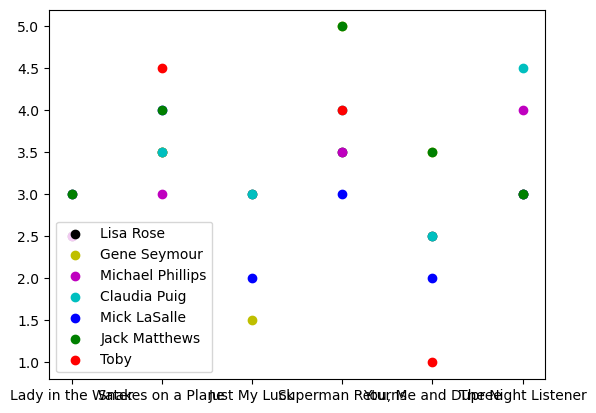

In [15]:
import matplotlib.pylab as plt

colors = list("rgbcmyk")

for data_dict in critics.values():
   x = data_dict.keys()
   y = data_dict.values()
   plt.scatter(x,y,color=colors.pop())

plt.legend(critics.keys())
plt.show()

### Berechnung von Empfehlungen mit User basiertem Collaborative Filtering
Für die Produkte, die von einer Person noch nicht gekauft wurden, sollen Empfehlungen berechnet werden. Die Empfehlungen können ebenfalls Werte zwischen 1 (wird nicht empfohlen) und 5 (wird stark empfohlen) annehmen. Für die Berechnung der Empfehlung werden die Bewertungen des jeweiligen Produkts durch die anderen Personen herangezogen. Dabei werden die Bewertungen der ähnlichen Personen (d.h. hoher Pearson-Korrelationswert) stärker mit einbezogen als die Bewertungen durch Personen mit einem niedrigen Korrelationswert.

__Beispiel:__
Toby hat die Filme *The Night Listener*, _Lady in the Water_ und _Just My Luck_ noch nicht gekauft. Für diese Filme soll für Toby eine Empfehlung berechnet werden.
In der unten aufgeführten Tabelle enthält die zweite Spalte die _Pearson-Ähnlichkeitswerte_ zwischen Toby und den anderen Personen. Die Spalten 3, 5 und 7 enthalten die Bewertungen der Filme *The Night Listener*, _Lady in the Water_ und _Just My Luck_ durch die anderen Personen. Die Spalten 4, 6 und 8 enthalten die jeweilige Filmbewertung gewichtet (mulipliziert) mit den Ähnlichkeitswerten der jeweiligen Person. Es fällt auf, dass in der Tabelle _Michael_ nicht enthalten ist. Das liegt daran, dass _Michael_ und _Toby_ einen negativen Ähnlichkeitswert aufweisen, d.h. deren Interessen sind gegenläufig. Personen mit negativem Ähnlichkeitswert sollten für Empfehlungen nicht berücksichtigt werden.
Die Zeile _Sum_ enthält die Summe aller gewichteten Bewertungen. Aus diesem Wert allein kann die Empfehlung noch nicht abgeleitet werden, da Filme die nur von wenigen Personen bewertet wurden, eine relativ kleine Summe ergeben. Deshalb sollte _Sum_ noch durch die Anzahl der Bewertungen für diesen Film geteilt werden. Oder besser: Nicht durch die Summe der Bewertungen, sondern durch die Summe der relevanten Ähnlichkeitswerte (*KSum*). Der resultierende Empfehlungswert ist in der letzten Zeile eingetragen.



<img src="https://maucher.home.hdm-stuttgart.de/Pics/recommenderFilmCalculation.PNG" style="width:500px" align="center">




__Aufgabe:__
Schreiben Sie eine Funktion *getRecommendations(prefs,person,similarity)*, mit der die Empfehlungswerte berechnet werden können und bestimmen Sie die Empfehlungswerte für Toby. Der Funktion wird  

* das Dictionary _critics_ mit den Filmbewertungen, 
* der Name der Person, für welche Empfehlungen berechnet werden sollen
* die Methode für die Berechnung der Ähnlichkeit *sim_euclid* oder *sim_pearson*

übergeben. Die Methode soll eine geordnete Liste zurück geben. Jedes Listenelement enthält an erster Stelle den berechneten Empfehlungswert und an zweiter Stelle den Namen des Films. Die Liste soll nach Empfehlungswerten absteigend geordnet sein.

Testen Sie diese Funktion indem Sie die Empfehlungen für _Toby_ berechnen und mit den Werten in der oben aufgeführten Tabelle vergleichen.

In [16]:
movies = ["Lady in the Water", "Snakes on a Plane", "Just My Luck", "Superman Returns", "You, Me and Dupree", "The Night Listener"]

def getRecommendations(prefs, person, similarity):
    recommendation_list = []

    # Get similarity of person
    pearson_persons = topMatches(prefs, person, similarity)

    # Get Unseen Movies
    unseen_movies_person = []
    for movie in movies:
        if movie not in prefs[person].keys():
            unseen_movies_person.append(movie)

    # Calculate for every movie
    for movie in unseen_movies_person:
        korrelation_sum = 0
        korrelation_review_sum = 0
        # Calculate for every person we want to compare
        for compare_person, value in pearson_persons.items():
            # person to unsimilar
            if value == -1: 
                continue

            # person did not watched movie
            if movie not in prefs[compare_person].keys():
                continue

            korrelation_sum += value
            korrelation_review_sum += value * prefs[compare_person][movie]

        # Calculate recommendation value for current movie
        recommendation_value = korrelation_review_sum / korrelation_sum
        recommendation_list.append((recommendation_value, movie))

    recommendation_list.sort(key=lambda tup: tup[0], reverse=True)
    return recommendation_list

In [17]:
print("Film Vorschläge Pearson:", getRecommendations(critics, "Toby", sim_pearson))
print("Film Vorschläge Euklid:", getRecommendations(critics, "Toby", sim_euclid))

Film Vorschläge Pearson: [(3.3477895267131004, 'The Night Listener'), (2.832549918264161, 'Lady in the Water'), (2.530980703765564, 'Just My Luck')]
Film Vorschläge Euklid: [(3.4273481378103887, 'The Night Listener'), (2.795737031164006, 'Lady in the Water'), (2.407392750287351, 'Just My Luck')]


### Berechnung von Empfehlungen mit Item basiertem Collaborative Filtering
In den vorigen Aufgaben wurden Ähnlichkeiten zwischen Personen bestimmt und für Produktempfehlungen benutzt (User basiertes Collaborative Filtering). Jetzt soll die Ähnlichkeit zwischen Produkten berechnet werden und auf der Basis dieser Produktähnlichkeit Empfehlungen berechnet werden (Item basiertes Collaborative Filtering).

Dabei sollen die bereits implementierten Ähnlichkeitsfunktion *sim_euclid* und *sim_pearson* sowie die Ähnlichkeeits-Sortierfunktion *topMatches* unverändert eingesetzt werden.

__Aufgabe:__

1. Implementieren Sie eine Funktion, welche das Bewertungsdictionary *critics* derart transformiert, dass die Funktionen `sim_euclid`, `sim_pearson` und `topMatches` für das Item-basierte CF unverändert eingesetzt werden können. Die transformierte Matrix soll unter dem Namen *transCritics* abgespeichert werden.
2. Schreiben Sie eine Funktion `calculateSimilarItems`, die aus der transformierten Matrix *transCritics* ein Dictionary berechnet, welches die Ähnlichkeit zwischen allen Filmen beschreibt. Die Keys des Dictionary sind die Filmnamen. Die Values sind geordnete Listen, welche die Funktion `topMatches` zurückgibt, wenn sie für die Filme (nicht für die User) aufgerufen wird. Dieses Dictionary wird an das aufrufende Programm zurück geben. 
3. Schreiben Sie eine Funktion `getRecommendedItems`, welche basierend auf dem im unten aufgeführten Beispiel dargestellten Verfahren unter Vorgabe der Bewertungsmatrix und der zu verwendenden Ähnlichkeitsfunktion Produktempfehlungen berechnet.
4. Testen Sie die Funktion indem Sie die Empfehlungen für Toby berechnen und mit den Werten in der unten aufgeführten Tabelle vergleichen

__Erläuterndes Beispiel:__

_Toby_ hat die Filme *The Night Listener*, *Lady in the Water* und *Just My Luck* noch nicht gekauft. Für diese Filme soll für *Toby* eine Empfehlung berechnet werden. Gekauft und bewertet hat *Toby* die Filme *Snakes on a plane*, *Superman Returns* und *You and me and Dupree*. Diese bereits vorhandenen Filme bilden die erste Spalte der unten dargestellten Matrix. In der zweiten Spalte befinden sich _Toby's_ Bewertungen dieser Filme. Die Spalten 3,5 und 7 enthalten die Ähnlichkeitswerte (mit *calculateSimilarItems* unter Verwendung des normierten euklidischen Ähnlichkeitsmaßes berechnet) zwischen den drei von *Toby* noch nicht gekauften Filmen und den drei von _Toby_ bewerteten Filmen. Diese Ähnlichkeitswerte werden jeweils mit _Toby's_ Bewertungen multipliziert. Das Resultat dieser Multiplikation befindet sich in den Spalten 4,6 und 8. Der finale Empfehlungswert für die von _Toby_ noch nicht gekauften Filme wird berechnet in dem in den Spalten 4,6 und 8 zunächst die Summe über die Werte dieser Spalte in den drei oberen Zeilen berechnet wird und durch die Summe über die Werte der Spalten 3,5 und 7 geteilt wird. Im Fall, dass die *Pearson-Korrelation* zwischen den Filmen als Ähnlichkeitswert herangezogen wird, können negative Ähnlichkeitswerte auftreten. Dann soll in die Berechnung eines Empfehlungswert für Film A nur dann die Bewertung von Film B einfließen, wenn der Korrelationswert zwischen beiden $>0$ ist.  


<img src="https://maucher.home.hdm-stuttgart.de/Pics/recommenderFilmItemBased.PNG" style="width:500px" align="center">


In [18]:
import pandas as pd

def transformCritics(prefs):
    # Convert prefs to dataframe
    prefs_data_frame = pd.DataFrame.from_dict(prefs)

    # Remove all nans and switch axes so movies are index and people are columns
    prefs_data_frame = prefs_data_frame.apply(lambda x : x.dropna().to_dict(), axis=1)
    
    # Return as dict
    return prefs_data_frame.to_dict()

trans_critics = transformCritics(critics)
print(trans_critics)

{'Lady in the Water': {'Lisa Rose': 2.5, 'Gene Seymour': 3.0, 'Michael Phillips': 2.5, 'Mick LaSalle': 3.0, 'Jack Matthews': 3.0}, 'Snakes on a Plane': {'Lisa Rose': 3.5, 'Gene Seymour': 3.5, 'Michael Phillips': 3.0, 'Claudia Puig': 3.5, 'Mick LaSalle': 4.0, 'Jack Matthews': 4.0, 'Toby': 4.5}, 'Just My Luck': {'Lisa Rose': 3.0, 'Gene Seymour': 1.5, 'Claudia Puig': 3.0, 'Mick LaSalle': 2.0}, 'Superman Returns': {'Lisa Rose': 3.5, 'Gene Seymour': 5.0, 'Michael Phillips': 3.5, 'Claudia Puig': 4.0, 'Mick LaSalle': 3.0, 'Jack Matthews': 5.0, 'Toby': 4.0}, 'You, Me and Dupree': {'Lisa Rose': 2.5, 'Gene Seymour': 3.5, 'Claudia Puig': 2.5, 'Mick LaSalle': 2.0, 'Jack Matthews': 3.5, 'Toby': 1.0}, 'The Night Listener': {'Lisa Rose': 3.0, 'Gene Seymour': 3.0, 'Michael Phillips': 4.0, 'Claudia Puig': 4.5, 'Mick LaSalle': 3.0, 'Jack Matthews': 3.0}}


In [70]:
def calculateSimilarItems(prefs, similarity):
    similar_items = {}
    for movie in prefs:
        similar_items[movie] = topMatches(prefs, movie, similarity)

    return similar_items

similar_items_euclid = calculateSimilarItems(trans_critics, sim_euclid)
similar_items_pearson = calculateSimilarItems(trans_critics, sim_euclid)
print("Ähnliche Filme Euklid:", similar_items_euclid)
print("")
print("Ähnliche Filme Pearson:", similar_items_pearson)

Ähnliche Filme Euklid: {'Lady in the Water': {'Snakes on a Plane': 0.7277142573518672, 'Just My Luck': 0.615911621788925, 'Superman Returns': 0.6125741132772068, 'You, Me and Dupree': 0.7655876216850789, 'The Night Listener': 0.7597469266479578}, 'Snakes on a Plane': {'Lady in the Water': 0.7277142573518672, 'Just My Luck': 0.5784128280412532, 'Superman Returns': 0.7578982763068516, 'You, Me and Dupree': 0.5824585256498355, 'The Night Listener': 0.7387961250362586}, 'Just My Luck': {'Lady in the Water': 0.615911621788925, 'Snakes on a Plane': 0.5784128280412532, 'Superman Returns': 0.5123025255147889, 'You, Me and Dupree': 0.6534537935444722, 'The Night Listener': 0.6303969981288705}, 'Superman Returns': {'Lady in the Water': 0.6125741132772068, 'Snakes on a Plane': 0.7578982763068516, 'Just My Luck': 0.5123025255147889, 'You, Me and Dupree': 0.5874822290669, 'The Night Listener': 0.6697893816771064}, 'You, Me and Dupree': {'Lady in the Water': 0.7655876216850789, 'Snakes on a Plane': 

In [78]:
def getRecommendedItems(prefs, transprefs, person, similarity):
    recommendation_list = []

    # Get Unseen Movies
    unseen_movies_person = []
    for movie in movies:
        if movie not in prefs[person].keys():
            unseen_movies_person.append(movie)

    for movie in unseen_movies_person:
        korrelation_sum = 0
        movie_similarity_sum = 0
        current_movie_similarities = calculateSimilarItems(transprefs, similarity)[movie] 

        # Loop over all movies similarities
        for current_movie, movie_similarity in current_movie_similarities.items():
            # Movie similarity is negative so movie should not be included
            if movie_similarity <= 0:
                continue
            
            # Person did not watched movie
            if current_movie not in prefs[person].keys():
                continue

            # Movie similarity * review of person, added to korrelation sum
            korrelation_sum += movie_similarity * prefs[person][current_movie]
            movie_similarity_sum += movie_similarity

        # If movie completly not included (cause all values negative) movie_similarity_sum will be 0
        if movie_similarity_sum != 0:
            normalized_value = korrelation_sum / movie_similarity_sum
            recommendation_list.append((normalized_value, movie))

    recommendation_list.sort(key=lambda tup: tup[0], reverse=True)
    return recommendation_list   

In [79]:
print("Vorgeschlagene Filme Toby Euklid:", getRecommendedItems(critics, trans_critics, "Toby", sim_euclid))
print("Vorgeschlagene Filme Toby Pearson:", getRecommendedItems(critics, trans_critics, "Toby", sim_pearson))

Vorgeschlagene Filme Toby Euklid: [(3.2044909601608804, 'The Night Listener'), (3.082136961799338, 'Lady in the Water'), (3.041861869079099, 'Just My Luck')]
Vorgeschlagene Filme Toby Pearson: [(3.610031066802179, 'Lady in the Water')]


## last.fm Musikempfehlungen

__Aufgabe:__

1. Installieren Sie das Package pylast. Stellen Sie durch Aufruf der Funktion *network=pylast.LastFMNetwork()* eine Verbindung zu *last.fm* her. Beim Aufruf der Funktion wird die Anmeldung und Authentifizierung durchgeführt. Die Funktion gibt ein Objekt der Klasse *Network* zurück. Über dieses Objekt können Methoden, wie

    * *get_artist("kuenstlerName")* (liefert Objekt der Klasse *Artist*)
    * *get_album("albumName")* (liefert Objekt der Klasse *Album*)
    * *get_track("songName")* (liefert Objekt der Klasse *Track*)
    * *get_user("userName"):* (liefert Objekt der Klasse *Tag*)
    * usw.
    
      aufgerufen werden. Die Menge aller verfügbaren Klassen und deren Attribute und Methoden können dem Modul _pylast.py_ entnommen werden.

1. Rufen Sie über das oben instanziierte *Network*-Objekt die Methode `get_artist("BandIhrerWahl")` auf.
2. Rufen Sie über das oben instanziierte *Artist*-Objekt die Methode `topfans=get_top_fans(10)` auf. Die Methode gibt eine Liste von _User_-Objekt/Gewichtung-Paaren zurück. Die Gewichtungen von Objekten werden in diesem Versuch nicht benötigt. Legen Sie deshalb mit `group=[a.item for a in topfan]` eine Liste an, die nur noch die User Objekte enthält. **Wichtige Anmerkung:** Seit August 2015 gibt es Probleme mit der lastFM API Methode `get_top_fans()` (siehe auch: [pylast issues](https://github.com/pylast/pylast/issues/155s)). Falls am Versuchstermin der Fehler noch nicht behoben ist, können Sie den unten stehenden Code benutzen. Darin wird versucht auf die API-Methode zuzugreifen. Falls das nicht möglich ist, wird eine vordefinierte Liste von Usern angewandt. Diese Liste repräsentiert die *Top Fans* der Band *Slipknot* im Frühjahr 2015. 
3. Implementieren Sie eine Funktion `createLastfmUserDict()`. Dieser Funktion soll, die oben angelegte Liste von *User*-Objekten _group_ übergeben werden. Für jeden User in *group* sollen die 20 beliebtesten Bands mit der Methode `topartists=get_top_artists()[0:20]` bestimmt werden. Die Methode gibt eine Liste von *Artist*-Objekt/Gewichtung-Paaren zurück. Die Gewichtungen von Objekten werden in diesem Versuch nicht benötigt. Auf das *i.te* *Artist*-Objekt selbst kann mit `topartists[i].item` zugegriffen werden. Die Menge aller Bands, die auf diese Weise gesammelt werden, wird im folgenden mit _AllBands_ bezeichnet. D.h. in *AllBands* befinden sich alle Bands, die für mindestens einen User in *group* zu den Top-20 gehören. Nun soll ein verschachteltes Dictionary mit Namen *userDict* wie folgt angelegt werden:

    * Die Keys sind die Namen der _User_-Objekte in _group_. Auf den Namen eines Objekts kann mit `get_name()` zugegriffen werden.
    * Die Values sind selbst wieder Dictionaries, deren Keys die Namen der Bands in *AllBands* sind. Achten Sie auch hier darauf, dass Sie nicht das *Artist*-Objekt selbst, sondern dessen Namen als Key verwenden. 
    * Für den User *a* und die Band *b* ist der Value `userDict[a][b]= 1`, falls *b* zu den Top-20 des Users *a* gehört. Andernfalls ist `userDict[a][b]= 0`. 
    
    Das derart angelegte Dictionary soll von der Funktion zurückgegeben werden. 
4. Wählen Sie jetzt einen beliebigen User aus *group*. Bestimmen Sie zu diesem User die ähnlichsten User in *group* durch Anwendung der im ersten Teilversuch implementierten Funktion `topMatches()`. Der Funktion wird das angelegte *userDict* und der Name des gewählten Users übergeben. Als Ähnlichkeitsmaß soll die euklidische Metrik angewandt werden.
5. Bestimmen Sie dann für den gewählten User Band-Empfehlungen durch Anwendung der im ersten Teilversuch implementierten Funktion `getRecommendations()`. Der Funktion wird das angelegte *userDict* und der Name des gewählten Users übergeben. Als Ähnlichkeitsmaß soll die euklidische Metrik, danach die Russel_Rao Metrik, angewandt werden.     
6. Diskutieren Sie das Ergebnis

In [21]:
import pylast
nw=pylast.LastFMNetwork(api_key = "993a5bd9d79a98a53677570368d55acd",api_secret = "9b8de0b57903ac007cdd8ec9003b341e",username = "pythonlab")
band='Slipknot'
art1 = nw.get_artist(band)
print("Most similar (as calculated by lastFM) for artist: ",band)
for it in art1.get_similar(5):
    print("%3.3f \t %s"%(it.match, it.item))
try:
    topfan = art1.get_top_fans()
    group = [a.item for a in topfan]
except:
    print("\nlastFM API Error for method get_top_fans\nApply predefined group of users")
    usernames=['BrunoJoS','DPREBOYE','MPistol40','NemoNightfall','SkyRif','Wags1382','Znapsen','cortapsyco','emill_67','sattuviitana']
    group=[]
    for u in usernames:
        u1 = nw.get_user(u)
        group.append(u1)

Most similar (as calculated by lastFM) for artist:  Slipknot
1.000 	 Stone Sour
0.985 	 Korn
0.710 	 System of a Down
0.653 	 Mudvayne
0.524 	 Corey Taylor

lastFM API Error for method get_top_fans
Apply predefined group of users
